<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/CNN/Age_and_Gender_Prediction_CNN_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Age_and_Gender_Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r"/content/drive/MyDrive/Colab/Kaggle/UTKFace"

In [ ]:
import os
files=os.listdir(path)

In [ ]:
print("Total Files : ",len(files))

Total Files :  23708


In [ ]:
import cv2
ages=[]
genders=[]
images=[]
i = 0
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=path +'/'+fle
  # print(total, age, gender,i)
  image=cv2.imread(total)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)
  ages.append(age)
  genders.append(gender)
  i = i+1
  if i==1000:
    break
print(i)

1000


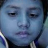

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[24])

In [ ]:
print(ages[24])
print(genders[24])

8
0


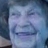

88
1


In [ ]:
cv2_imshow(images[53])

print(ages[53])
print(genders[53])

In [ ]:
import numpy as np

In [ ]:
pt = r"/content/drive/MyDrive/Colab/DL/Model/"
# np.save(pt+'image.npy',images_f)
# np.save(pt+'gender.npy',genders_f)
# np.save(pt+'age.npy',ages_f)
ages_f = np.load(pt+'age.npy')
genders_f = np.load(pt+'gender.npy')
images_f = np.load(pt+'image.npy')

images_f_2=images_f/255

In [ ]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


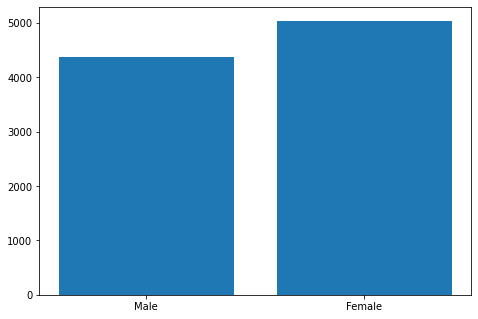

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[4372,5047]
ax.bar(gender,values)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
pt_model = r"/content/drive/MyDrive/Colab/DL/Model/Age_sex_detection.h5"

model = load_model(pt_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
  plt.imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ str(age))
  print("Predicted Sex: "+ sex_f[sex])

Predicted Age: 23
Predicted Sex: Female


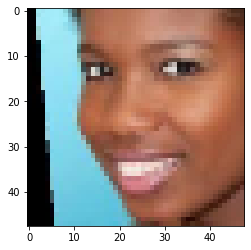

In [ ]:
test_image(57,images_f,images_f_2,model)

Predicted Age: 44
Predicted Sex: Male


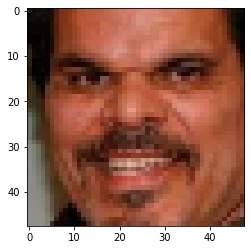

In [ ]:
test_image(137,images_f,images_f_2, model)

In [ ]:
ages_f[7000]

29

Predicted Age: 28
Predicted Sex: Female


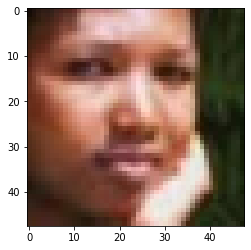

In [ ]:
test_image(7000,images_f,images_f_2, model)

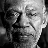

Predicted Age: 54
Predicted Sex: Male


In [ ]:
img_path = r"/content/drive/MyDrive/Colab/Kaggle/UTKFace/78_0_1_20170111210701342.jpg.chip.jpg"
image=cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image= cv2.resize(image,(48,48))
cv2_imshow(image)
images_f=image/255
pred_1 = model.predict(np.array([images_f]))
#print(pred_1)
sex_f=['Male','Female']
age=int(np.round(pred_1[1][0]))
sex=int(np.round(pred_1[0][0]))
print("Predicted Age: "+ str(age))
print("Predicted Sex: "+ sex_f[sex])

In [ ]:
def newImg(img_path):
  image1=cv2.imread(img_path)
  image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  cv2_imshow(image1)
  images_f=image/255
  pred_1 = model.predict(np.array([images_f]))
  #print(pred_1)
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ str(age))
  print("Predicted Sex: "+ sex_f[sex])

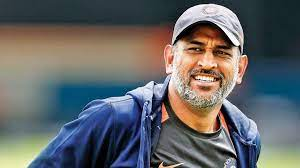

Predicted Age: 45
Predicted Sex: Male


In [ ]:
img_path = r"/content/drive/MyDrive/Colab/DL/Model/dhoni.jpg"
newImg(img_path)

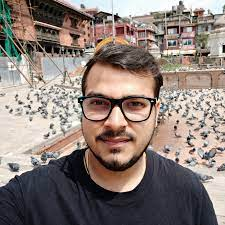

Predicted Age: 30
Predicted Sex: Male


In [ ]:
img_path = r"/content/drive/MyDrive/Colab/DL/Model/krishN.jpg"
newImg(img_path)

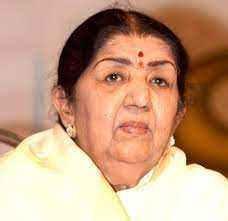

Predicted Age: 46
Predicted Sex: Female


In [ ]:
img_path = r"/content/drive/MyDrive/Colab/DL/Model/lata.jpg"
newImg(img_path)

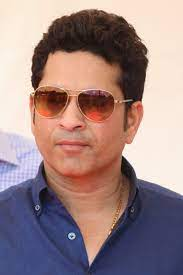

Predicted Age: 37
Predicted Sex: Male


In [ ]:
img_path = r"/content/drive/MyDrive/Colab/DL/Model/sachin.jpg"
newImg(img_path)

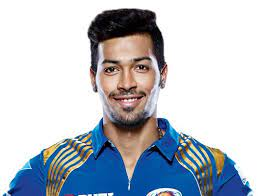

Predicted Age: 29
Predicted Sex: Male


In [ ]:
img_path = r"/content/drive/MyDrive/Colab/DL/Model/hardikP.jpg"
newImg(img_path)

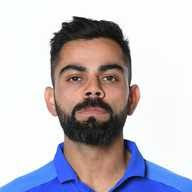

Predicted Age: 39
Predicted Sex: Male


In [ ]:
img_path = r"/content/drive/MyDrive/Colab/DL/Model/viratK.jpg"
newImg(img_path)